In [8]:
import numpy as np, pandas as pd, tensorflow as tf

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [14]:
train_size = int(len(data) * 0.8)
train_data = np.array(data[0 : train_size])
test_data = np.array(data[train_size : len(data)])

print('훈련 데이터의 크기 :', train_data.shape)
print('테스트 데이터의 크기 :', test_data.shape)

훈련 데이터의 크기 : (260, 1)
테스트 데이터의 크기 : (65, 1)


In [25]:
window = 12
X_train, y_train = [], []
for i in range(len(train_data)-window):
    X_train.append(train_data[i:i+window])
    y_train.append(train_data[i+window])
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
X_test, y_test = [], []
for i in range(len(test_data)-window):
    X_test.append(test_data[i:i+window])
    y_test.append(test_data[i+window])
X_test, y_test = np.array(X_test), np.array(y_test)

In [28]:
model_RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model_RNN.compile(optimizer='adam', loss='mse')
model_RNN.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0031
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7758e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6621e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011    
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6271e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3618e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.7191e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4207e-04
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5716e-04
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0575e-04
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

In [39]:
RNN_y_pred = model_RNN.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


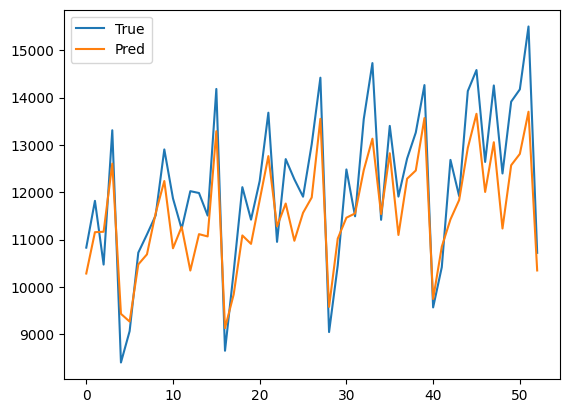

In [40]:
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(RNN_y_pred), label='Pred')
plt.legend(); plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

print('평균제곱근오차', mean_squared_error(RNN_y_pred, y_test))

평균제곱근오차 0.004707116157767733


In [42]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model_LSTM.compile(optimizer='adam', loss='mse')
model_LSTM.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0513
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053
Epoch 16/50
31/31 ━

In [44]:
LSTM_y_pred = model_LSTM.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


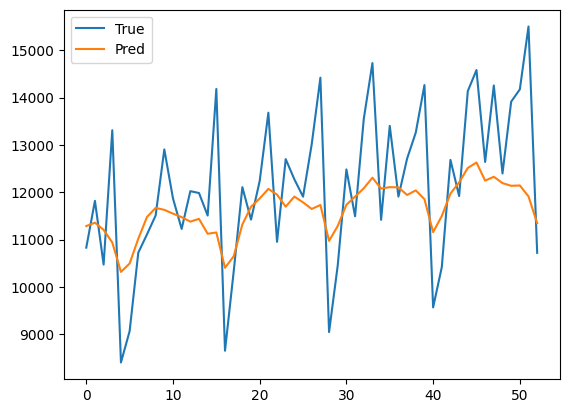

In [45]:
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(LSTM_y_pred), label='Pred')
plt.legend(); plt.show()

In [47]:
print('평균제곱근오차', mean_squared_error(LSTM_y_pred, y_test))

평균제곱근오차 0.012223789611882016
